<a href="https://colab.research.google.com/github/manal-zbakh/Predict-Future-Sales/blob/main/Predict_Future_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"mouadbarrou","key":"9ad616a4d1a2548360b3eb0e26ef5a80"}'}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                                   title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
muratkokludataset/date-fruit-datasets                                 Date Fruit Datasets                              408KB  2022-04-03 09:25:39           9412       1273  0.9375           
victorsoeiro/netflix-tv-shows-and-movies                              Netflix TV Shows and Movies                        2MB  2022-05-15 00:01:23           1620         61  1.0              
mdmahmudulhasansuzan/students-adaptability-level-in-online-education  Students Adaptability Level in Online Education    6KB  2022-04-16 04:46:28           6260        160  1.0              
muratkokludataset/acoustic-extinguisher-fire-

In [ ]:
! kaggle competitions download -c competitive-data-science-predict-future-sales

competitive-data-science-predict-future-sales.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip competitive-data-science-predict-future-sales

Archive:  competitive-data-science-predict-future-sales.zip
replace item_categories.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# Import Libraries
# Pandas est une bibliothèque écrite pour le langage de programmation Python permettant la manipulation et l'analyse des données. Elle propose en particulier des structures de données et des opérations de manipulation de tableaux numériques et de séries temporelles. Pandas est un logiciel libre sous licence BSD.
import pandas as pd
#Matplotlib est une bibliothèque du langage de programmation Python destinée à tracer et visualiser des données sous formes de graphiques. Elle peut être combinée avec les bibliothèques python de calcul scientifique NumPy et SciPy.
import matplotlib.pyplot as plt
#NumPy est une bibliothèque pour langage de programmation Python, destinée à manipuler des matrices ou tableaux multidimensionnels ainsi que des fonctions mathématiques opérant sur ces tableaux.
import numpy as np
#Seaborn est une bibliothèque Python de visualisation de données basée sur matplotlib. Il fournit une interface de haut niveau pour dessiner des graphiques statistiques attrayants et informatifs.
import seaborn as sns
#Pour afficher toutes les colonnes de Pandas DataFrame dans Jupyter Notebook
pd.options.display.max_columns = 1000
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# **1. Descriptive and exploratory data analysis**

In [ ]:
# reading data
#item_categories:supplemental information about the items categories.
item_categories = pd.read_csv("/content/item_categories.csv", sep=",")
#items: supplemental information about the items/products.
items = pd.read_csv("/content/items.csv", sep=",")
#shops: supplemental information about the shops.
shops = pd.read_csv("/content/shops.csv", sep=",")
#test: the test set.
test = pd.read_csv("/content/test.csv", sep=",")
#sales_train:the training set. 
sales_train = pd.read_csv("/content/sales_train.csv", sep=",")

In [ ]:
def data(df):
    print("----------TOP 5 RECORDS--------")
    print(df.head(5))
    print("----------INFO-----------------")
    print(df.info())
    print("----------Describe-------------")
    print(df.describe())
    print("----------Data Types-----------")
    print(df.dtypes)
    print("-------Missing Values----------")
    print(df.isnull().sum())
    print("-------NULL values-------------")
    print(df.isna().sum())
    print("-----Shape Of Data-------------")
    print(df.shape)
    print("----------Columns--------------")
    print(df.columns)

In [ ]:
print("=============================sales_train=============================")
data(sales_train)

=============================sales_train=============================
----------TOP 5 RECORDS--------
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0
----------INFO-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
None
---------

- date_block_num : a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33
- shop_id : unique identifier of a shop.
- item_id : unique identifier of a product.
- item_price : current price of an item.
- item_cnt_day : number of products sold. 


In [ ]:
print("=============================Test=============================")
data(test)

=============================Test=============================
----------TOP 5 RECORDS--------
   ID  shop_id  item_id
0   0        5     5037
1   1        5     5320
2   2        5     5233
3   3        5     5232
4   4        5     5268
----------INFO-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB
None
----------Describe-------------
                  ID        shop_id        item_id
count  214200.000000  214200.000000  214200.000000
mean   107099.500000      31.642857   11019.398627
std     61834.358168      17.561933    6252.644590
min         0.000000       2.000000      30.000000
25%     53549.750000      16.000000    5381.500000
50%    107099.500000      34.500000   11203.000000
75

In [ ]:
print("=============================Item Categories=============================")
data(item_categories)

=============================Item Categories=============================
----------TOP 5 RECORDS--------
        item_category_name  item_category_id
0  PC - Гарнитуры/Наушники                 0
1         Аксессуары - PS2                 1
2         Аксессуары - PS3                 2
3         Аксессуары - PS4                 3
4         Аксессуары - PSP                 4
----------INFO-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB
None
----------Describe-------------
       item_category_id
count         84.000000
mean          41.500000
std           24.392622
min            0.000000
25%           20.750000
50%           41.500000
75%           62.250000
max           83.00

- item_category_id : unique identifier of item category.
- item_category_name : name of item category.

In [ ]:
print("=============================Items=============================")
data(items)

=============================Items=============================
----------TOP 5 RECORDS--------
                                           item_name  item_id  \
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4        ***КОРОБКА (СТЕКЛО)                       D        4   

   item_category_id  
0                40  
1                76  
2                40  
3                40  
4                40  
----------INFO-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int

- item_name : name of item.
- item_id : unique identifier of a product.

In [ ]:
print("=============================Shops=============================")
data(shops)

=============================Shops=============================
----------TOP 5 RECORDS--------
                        shop_name  shop_id
0   !Якутск Орджоникидзе, 56 фран        0
1   !Якутск ТЦ "Центральный" фран        1
2                Адыгея ТЦ "Мега"        2
3  Балашиха ТРК "Октябрь-Киномир"        3
4        Волжский ТЦ "Волга Молл"        4
----------INFO-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
----------Describe-------------
         shop_id
count  60.000000
mean   29.500000
std    17.464249
min     0.000000
25%    14.750000
50%    29.500000
75%    44.250000
max    59.000000
----------Data Types-----------
shop_name    object
shop_id       int64
dtype: object
-------Missing Values---------

- shop_name : name of shop.
- shop_id : unique identifier of a shop.

In [ ]:
sales_train["item_cnt_day"].unique()

array([ 1.000e+00, -1.000e+00,  3.000e+00,  2.000e+00,  4.000e+00,
        5.000e+00,  1.300e+01,  7.000e+00,  6.000e+00,  8.000e+00,
        1.000e+01,  1.100e+01,  3.000e+01,  2.200e+01,  1.400e+01,
        1.500e+01,  9.000e+00,  1.200e+01,  1.700e+01,  1.900e+01,
        2.000e+01, -5.000e+00, -6.000e+00, -3.000e+00, -2.000e+00,
        1.600e+01,  6.400e+01,  1.800e+01,  2.900e+01,  2.600e+01,
        3.900e+01,  2.100e+01,  2.700e+01,  5.300e+01,  2.500e+01,
        2.300e+01,  2.400e+01,  4.000e+01,  2.800e+01,  3.100e+01,
        3.600e+01, -4.000e+00,  3.200e+01,  3.500e+01,  4.100e+01,
        8.800e+01,  4.400e+01,  5.200e+01,  5.600e+01,  3.800e+01,
        3.400e+01,  5.700e+01,  6.900e+01,  3.700e+01,  4.700e+01,
        5.000e+01,  4.800e+01,  3.300e+01,  6.100e+01,  8.000e+01,
        4.200e+01,  8.200e+01,  2.000e+02,  1.000e+02,  7.600e+01,
        7.700e+01,  1.070e+02,  4.600e+01,  4.900e+01,  7.000e+01,
        5.500e+01,  6.000e+01,  4.500e+01,  7.100e+01,  6.500e

In [ ]:
print("-------------------------------------------")
print("Max value in col 'item_cnt_day': ", sales_train['item_cnt_day'].max())
print("Min value in col 'item_cnt_day': ", sales_train['item_cnt_day'].min())
print("-------------------------------------------")

-------------------------------------------
Max value in col 'item_cnt_day':  2169.0
Min value in col 'item_cnt_day':  -22.0
-------------------------------------------


In [ ]:
len(sales_train[sales_train['item_cnt_day'] < 0])

7356

# **2. Data Preprocessing**

## **2.1. Find Outliers**

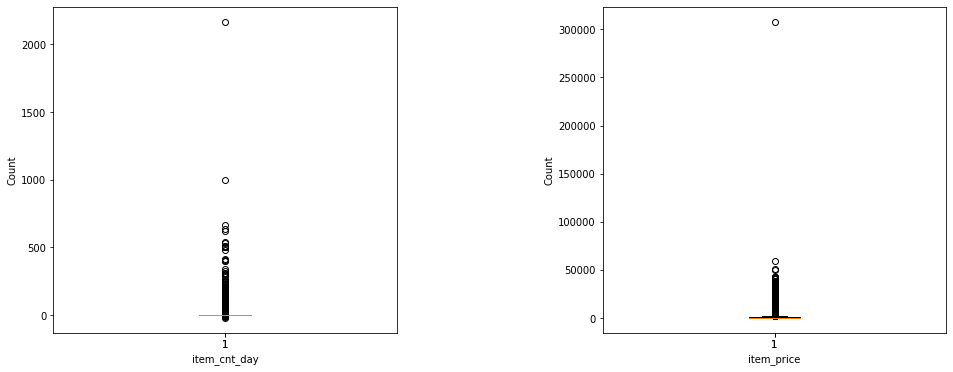

In [ ]:
# Find outliers in the columns sales_train.'item_cnt_day',sales_train.'item_price'
cols = ['item_cnt_day','item_price']
fig, ax = plt.subplots(ncols = len(cols), figsize = (8 * len(cols),6), sharex = True)

# wspace : the amount of width reserved for space between subplots, expressed as a fraction of the average axis width
fig.subplots_adjust(wspace=0.6)

for i in range(len(cols)):
  ax[i].boxplot(sales_train[cols[i]])
  ax[i].set_xlabel(cols[i])
  ax[i].set_ylabel("Count")

- item_cnt_day has outlier > 2000
- item_price has outlier > 300000

## **2.2. Remove observed outliers**

In [ ]:
# Remove Outliers
outlier1 = sales_train[sales_train['item_cnt_day'] > 2000].index[0]
outlier2 = sales_train[sales_train['item_price'] > 300000].index[0]
sales_train.drop([outlier1,outlier2], axis = 0, inplace = True)

# Reset index
sales_train.reset_index(inplace=True,drop=True)

## **2.3. Find Anomalies**

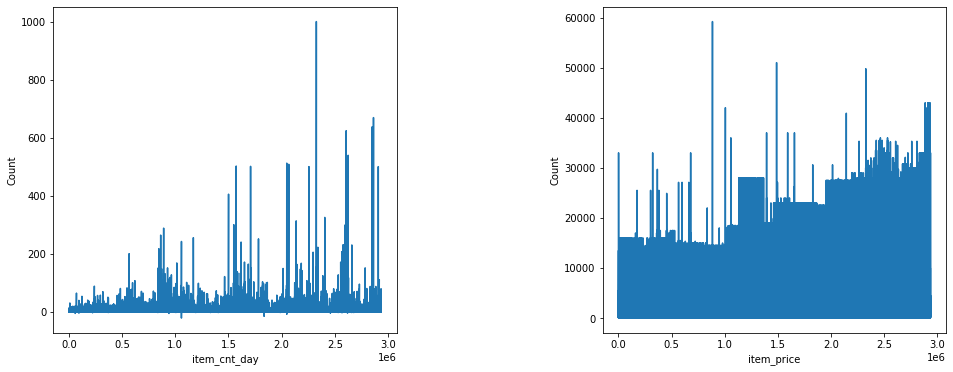

In [ ]:
# Find anomalies in the columns sales_train.'item_cnt_day',sales_train.'item_price'
cols = ['item_cnt_day','item_price']
fig, ax = plt.subplots(ncols = len(cols), figsize = (8 * len(cols),6), sharex = True)
fig.subplots_adjust(wspace=0.6)

for i in range(len(cols)):
  ax[i].plot(sales_train[cols[i]])
  ax[i].set_xlabel(cols[i])
  ax[i].set_ylabel("Count")

- Column 'item_cnt_day' has some negative values which could be items that were 'returned'. Since we will be considering monthly counts, we will leave the negative values in there so that we get a correct count of items sold when we aggregrate by month

# **3. Feature engineering**

In [ ]:
# Get maximum number in column 'date_block_num' representing the last month in data
sales_train_max_month = sales_train.date_block_num.max()

# Add column 'date_block_num' to the test dataset. The values would be sales_train_max_month + 1 representing next month
test['date_block_num'] = sales_train_max_month + 1

# Create temp table to concat modified sales_train and test datasets
sales_temp = pd.concat([sales_train,test])

# Create monthly sales data by aggregating on column 'item_cnt_day' and then rename column to 'item_cnt_month'
sales_monthly = sales_temp.groupby(by = ['date_block_num','shop_id','item_id'], as_index=False).agg({'item_cnt_day':'sum'})
sales_monthly = sales_monthly.rename(columns={'item_cnt_day':'item_cnt_month'})

In [ ]:
# Add new lag column 'lag_item_cnt_month' by shifting values from 'item_cnt_month' by 1
sales_monthly['lag_item_cnt_month'] = sales_monthly['item_cnt_month'].shift(1)

# Remove na values in the lag column
sales_monthly.fillna(0, inplace=True)
sales_monthly.isna().sum()

date_block_num        0
shop_id               0
item_id               0
item_cnt_month        0
lag_item_cnt_month    0
dtype: int64

# **4. Data Preparation**

In [ ]:
# The 'date_block_num' must be split as contiguos months of training data and validation data
split_ratio = 0.8
train_valid_split = np.floor(sales_train_max_month*split_ratio)
train_data = sales_monthly[sales_monthly['date_block_num'] <= train_valid_split]
valid_data = sales_monthly[(sales_monthly['date_block_num'] > train_valid_split) & (sales_monthly['date_block_num'] < sales_train_max_month+1)]

# Test data will be the 'date_block_num' is sales_train_max_month+1
test_data = sales_monthly[sales_monthly['date_block_num'] == sales_train_max_month+1]

In [ ]:
# Create X and y variables for train, validation and test sets
X_train = train_data.drop('item_cnt_month',axis=1)
y_train = train_data['item_cnt_month']

X_valid = valid_data.drop('item_cnt_month',axis=1)
y_valid = valid_data['item_cnt_month']

X_test = test_data.drop('item_cnt_month',axis=1)
y_test = test_data['item_cnt_month']

In [ ]:
X_test.columns

Index(['date_block_num', 'shop_id', 'item_id', 'lag_item_cnt_month'], dtype='object')

# **5. Model Training and Prediction**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Fit linear regression model to training set
model = LinearRegression()
model.fit(X_train,y_train)

# Use model to Predict labels for validation and test sets 
train_pred =  model.predict(X_train)
valid_pred = model.predict(X_valid)
test_pred = model.predict(X_test)

# Error metrics
print(f'Root Mean Square Train Data = {np.sqrt(mean_squared_error(y_train,train_pred))}')
print(f'Root Mean Square Validation Data = {np.sqrt(mean_squared_error(y_valid,valid_pred))}')  

Root Mean Square Train Data = 8.117034222606708
Root Mean Square Validation Data = 9.860192643190723


**Model Evaluation using K-Fold cross-validaiton**

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_valid, y_valid, scoring='neg_mean_squared_error', cv=5)
print("Accuracy: %0.2f [%s]" % (-scores.mean(), model))

Accuracy: 94.60 [LinearRegression()]


In [ ]:
X_test["prédicted"]=model.predict(X_test)

In [ ]:
X_test.head()

,date_block_num,shop_id,item_id,lag_item_cnt_month,prédicted
1609123,34,2,30,1.0,2.480006
1609124,34,2,31,0.0,2.382745
1609125,34,2,32,0.0,2.382729
1609126,34,2,33,0.0,2.382713
1609127,34,2,38,0.0,2.382635
